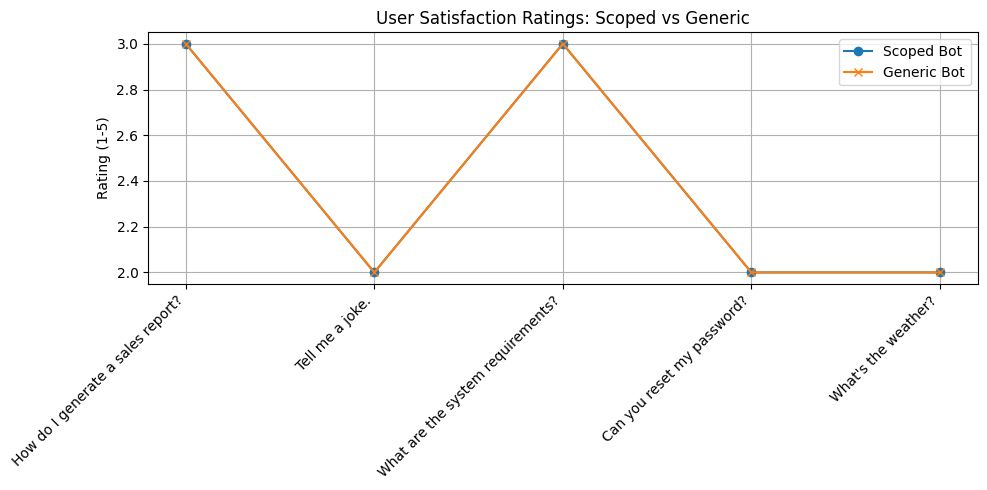

,query,intent,scoped_response,generic_response,scoped_rating,generic_rating
0,How do I generate a sales report?,feature_help,[ERROR] \n\nYou tried to access openai.ChatCom...,[ERROR] \n\nYou tried to access openai.ChatCom...,3,3
1,Tell me a joke.,off_topic,[ERROR] \n\nYou tried to access openai.ChatCom...,[ERROR] \n\nYou tried to access openai.ChatCom...,2,2
2,What are the system requirements?,feature_help,[ERROR] \n\nYou tried to access openai.ChatCom...,[ERROR] \n\nYou tried to access openai.ChatCom...,3,3
3,Can you reset my password?,support,[ERROR] \n\nYou tried to access openai.ChatCom...,[ERROR] \n\nYou tried to access openai.ChatCom...,2,2
4,What's the weather?,off_topic,[ERROR] \n\nYou tried to access openai.ChatCom...,[ERROR] \n\nYou tried to access openai.ChatCom...,2,2



### 🔑 Takeaways from the Demo

- **Scoped bots perform better** when aligned with user expectations.
- **Generic bots lead to inconsistent user experiences**, especially when training data and interaction scope are misaligned.
- **Rejecting off-topic queries improves user trust** if done transparently.
- **User simulation enables early validation** of product assumptions.
- **Smaller models or scoped prompts may yield better ROI** than blindly using the biggest models.
- **AI integration needs structured intent, clear scope, and iterative feedback** loops to succeed.


In [5]:
# AI Product Retrospective Demo – All-in-One Cell

import openai
import os
import random
import pandas as pd
import matplotlib.pyplot as plt
from google.colab import userdata
from IPython.display import Markdown

# STEP 1: Load secret API key
openai.api_key = userdata.get('OPENAI_API_KEY')  # Make sure to add this secret in Colab

# STEP 2: Simulated user queries
scenarios = [
    {"user_query": "How do I generate a sales report?", "intent": "feature_help"},
    {"user_query": "Tell me a joke.", "intent": "off_topic"},
    {"user_query": "What are the system requirements?", "intent": "feature_help"},
    {"user_query": "Can you reset my password?", "intent": "support"},
    {"user_query": "What's the weather?", "intent": "off_topic"},
]

# Scoped vs Generic prompts
def scoped_prompt(query):
    return f"You are a product assistant. Only answer questions about product features. If the query is unrelated, reply with: 'Sorry, I can only help with product features.'\n\nUser: {query}"

def generic_prompt(query):
    return f"You are a general-purpose chatbot. Answer the following user question:\n\nUser: {query}"

# Get response from OpenAI or simulate
def get_response(prompt, model="gpt-3.5-turbo"):
    if not openai.api_key:
        return "[MOCKED RESPONSE] " + prompt[:50] + "..."
    try:
        response = openai.ChatCompletion.create(
            model=model,
            messages=[{"role": "user", "content": prompt}],
            temperature=0.3
        )
        return response['choices'][0]['message']['content']
    except Exception as e:
        return f"[ERROR] {str(e)}"

# Generate responses
results = []
for scenario in scenarios:
    query = scenario["user_query"]
    intent = scenario["intent"]

    scoped = get_response(scoped_prompt(query))
    generic = get_response(generic_prompt(query))

    results.append({
        "query": query,
        "intent": intent,
        "scoped_response": scoped,
        "generic_response": generic
    })

df = pd.DataFrame(results)

# Simulate user ratings
def simulate_rating(response, intent):
    if "Sorry" in response and intent != "feature_help":
        return 5  # Good rejection
    if "Sorry" in response and intent == "feature_help":
        return 1  # Wrongly rejected
    if intent == "feature_help" and "feature" in response.lower():
        return 5  # Good answer
    if intent != "feature_help" and "Sorry" not in response:
        return 2  # Answered something irrelevant
    return 3  # Neutral

df["scoped_rating"] = df.apply(lambda row: simulate_rating(row['scoped_response'], row['intent']), axis=1)
df["generic_rating"] = df.apply(lambda row: simulate_rating(row['generic_response'], row['intent']), axis=1)

# Plot
plt.figure(figsize=(10, 5))
plt.plot(df.index, df["scoped_rating"], label="Scoped Bot", marker='o')
plt.plot(df.index, df["generic_rating"], label="Generic Bot", marker='x')
plt.xticks(df.index, df["query"], rotation=45, ha="right")
plt.title("User Satisfaction Ratings: Scoped vs Generic")
plt.ylabel("Rating (1-5)")
plt.legend()
plt.tight_layout()
plt.grid(True)
plt.show()

# Display data and takeaways
display(df)

Markdown("""
### 🔑 Takeaways from the Demo

- **Scoped bots perform better** when aligned with user expectations.
- **Generic bots lead to inconsistent user experiences**, especially when training data and interaction scope are misaligned.
- **Rejecting off-topic queries improves user trust** if done transparently.
- **User simulation enables early validation** of product assumptions.
- **Smaller models or scoped prompts may yield better ROI** than blindly using the biggest models.
- **AI integration needs structured intent, clear scope, and iterative feedback** loops to succeed.
""")
